# Neural networks from scratch

A neural network is a function that given an information codified in a vector $x\in\mathbb{F}^n$, its processing results in another vector $y\in\mathbb{F}^m$. In other words, it is a function $f(x) : \mathbb{F}^n \to \mathbb{F}^m$. The field $F$ can represent real numbers, natural numbers, etc.

The strength of the neural network is based on the huge number of combinations of its parameters, that can approximate almost any kind of function. Let see this in more detail.

## Structure of a neural network

<img src="nn.png" alt="nn" width="200"/>

Neural networks consists of three classes of components: layers, links, and neurons.

There are three kind of *layers*: The first one called *input*, the last one called *output*, and the rest in between called *hidden*. Each layer consists of a number of neurons.

*Neurons* are functions whose **output are scalars**, i.e., $n(z) : \mathbb{R}^p \to \mathbb{R}$. For the input layer, we have the special case $n_i = x_i$. For the other layers, the inputs $z$ are the outputs of the neurons from the previous layers.

*Links* are the connections between neurons, i.e., the output of one neuron, is part of the input of another neuron. For example, a *dense* neural network means that the output of the neuron at a layer $i$ is an input for every neuron at the layer $i+1$.

Lets see how the function $n(z)$ looks like for a neuron that is not at the input layer.

<img src="neuron.png" alt="neuron" width="400"/>

$n(z) = f(\sum_i w_i z_i + b), $ where $f(\cdot)$ is a non-linear function, usually with image $[0, 1]$ such as the sigmoid function $f(x) = \frac{1}{1 + e^{-x}}$. We call $w_i \in\mathbb{R}$ the weights that multiply each of the inputs $z_i$, and a bias $b\in\mathbb{R}$.

A nice property of the sigmoid function is that its derivative is $f'(x) = f(x)(1 - f(x))$.

Lets see how the sigmoid function looks like:

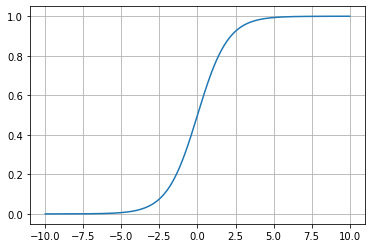

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10,10, 1000)
f_x = 1 / (1 + np.exp(-x))

fig, ax = plt.subplots(1,1)
ax.plot(x, f_x)
ax.grid()

And now, lets code our first neuron:

In [6]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        return sigmoid (self.weights.dot(inputs) + self.bias)
    
weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 0
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


And now, lets codify a simple neural network

<img src="simplenn.png" alt="simplenn" width="400"/>

In [8]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        return sigmoid (self.weights.dot(inputs) + self.bias)

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
    

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


Now, the neural network alone is not a very useful object. How do we know it works?

We are going to *train* it, i.e., for known pairs input-output, we are going to select appropiate values for the weights and for the biases so that we can estimate what is the output for unknown inputs.

We first compare the output of the network with the desired output, i.e., we are going to use a *loss* (or cost) function, for example $\text{LOSS} = \frac{1}{m}\sum_{i=1}^m (y_{d_i} - y_d)^2 = \frac{1}{m}||y_d - y||^2$, where $m$ is the number of Neuron in the output layer.

# Lets review the Gradient descent first

In [ ]:
# To do in class

How to do the gradient descent in a Neural Network? We need to minimize the LOSS function, which is a function of weights $w$ and biases $b$.

**Backpropagation** technique by exploiting the *chain rule*

How much we need to increase/decrease a weight $w_1$?

$\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y} \frac{\partial y}{\partial w_1} = \frac{2}{m}(y_d - y) \frac{\partial y}{\partial w_1}$

$y = f(w_5h_1 + w_6h_2 + b_3)$

$\frac{\partial y}{\partial w_1} = \frac{\partial y}{\partial h_1}\frac{\partial h_1}{\partial w_1}$

$\frac{\partial y}{\partial h_1} = w_5 f'(w_5h_1 + w_6h_2 + b_3)$

$h_1 = f(w_1x_1 + w_2x_2 + b_1)$

$\frac{\partial h_1}{\partial w_1} = x_1 f'(w_1x_1 + w_2x_2 + b_1)$

## Therefore, the gradient descent for $w_1$ is

$w_1(k+1) = w_1(k) - \eta \frac{\partial L}{\partial w_1}|_{w_1(k)}$, where $\eta$ is the *learning rate*, or the step to perform the gradient descent in its discrete version.

Now, lets train our Neural Network with some data.

In [19]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  '''

  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [50, 10], # House 1  Price / Distance to the city center
  [25, 6],  # House 2
  [17, 4],  # House 3
  [15, 7],  # House 4
])
all_y_trues = np.array([
  1, # House 1 , 1 overpriced, 0 no overprice
  1, # House 2
  0, # House 3
  0, # House 4
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
h5 = np.array([70, 6]) 
h6 = np.array([15, 6])

print("House 5: %.3f" % network.feedforward(h5)) # Close to one, overpriced
print("House 6: %.3f" % network.feedforward(h6)) # Close to zero, no overpriced

Epoch 0 loss: 0.306
Epoch 10 loss: 0.264
Epoch 20 loss: 0.253
Epoch 30 loss: 0.251
Epoch 40 loss: 0.250
Epoch 50 loss: 0.250
Epoch 60 loss: 0.250
Epoch 70 loss: 0.250
Epoch 80 loss: 0.250
Epoch 90 loss: 0.250
Epoch 100 loss: 0.250
Epoch 110 loss: 0.250
Epoch 120 loss: 0.250
Epoch 130 loss: 0.250
Epoch 140 loss: 0.250
Epoch 150 loss: 0.250
Epoch 160 loss: 0.250
Epoch 170 loss: 0.250
Epoch 180 loss: 0.250
Epoch 190 loss: 0.250
Epoch 200 loss: 0.250
Epoch 210 loss: 0.250
Epoch 220 loss: 0.250
Epoch 230 loss: 0.250
Epoch 240 loss: 0.250
Epoch 250 loss: 0.250
Epoch 260 loss: 0.250
Epoch 270 loss: 0.250
Epoch 280 loss: 0.250
Epoch 290 loss: 0.250
Epoch 300 loss: 0.250
Epoch 310 loss: 0.250
Epoch 320 loss: 0.250
Epoch 330 loss: 0.250
Epoch 340 loss: 0.250
Epoch 350 loss: 0.250
Epoch 360 loss: 0.250
Epoch 370 loss: 0.250
Epoch 380 loss: 0.250
Epoch 390 loss: 0.250
Epoch 400 loss: 0.250
Epoch 410 loss: 0.250
Epoch 420 loss: 0.250
Epoch 430 loss: 0.250
Epoch 440 loss: 0.250
Epoch 450 loss: 0.250